Mean Squared Error: 0.26
R^2 Score: 0.78


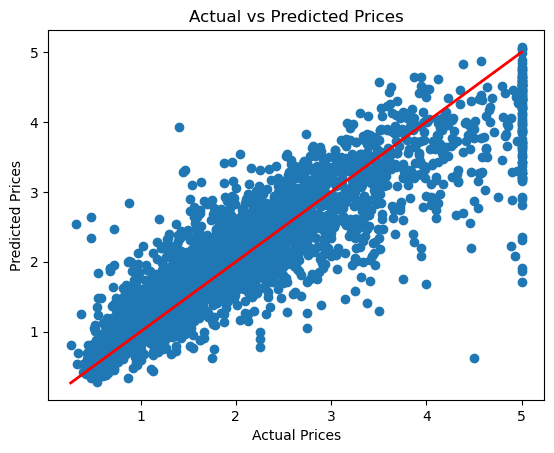

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Загрузка данных
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='Price')

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Объединение признаков и целевой переменной для удаления выбросов
data = pd.concat([X, y], axis=1)

# Удаление выбросов
data_clean = remove_outliers(data, california.feature_names)

# Разделение данных обратно на признаки и целевую переменную
X_clean = data_clean[california.feature_names]
y_clean = data_clean['Price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели градиентного бустинга
model_e = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_e.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = model_e.predict(X_test_scaled)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


попробуем сгенерировать просто рандомные данные 

Mean Squared Error of New Model: 1.11
R^2 Score of New Model: 0.04


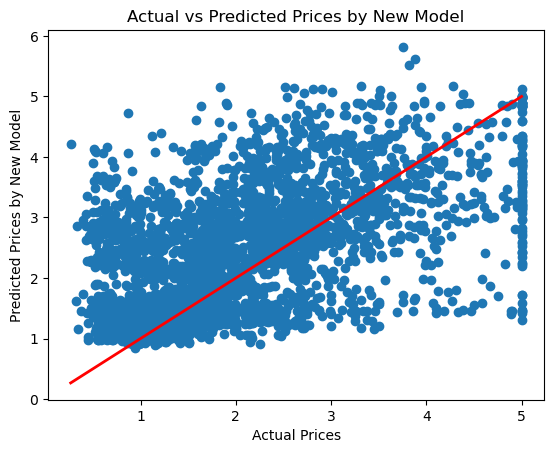

In [3]:
# Генерация случайных данных для вызова обученной модели
num_samples = 1000
random_data = np.random.rand(num_samples, X_train_scaled.shape[1])
scaler = StandardScaler()
random_data_scaled = scaler.fit_transform(random_data)

# Использование обученной модели для генерации предсказаний
generated_targets = model_e.predict(random_data_scaled)

# Создание нового обучающего набора данных
new_X = pd.DataFrame(random_data, columns=california.feature_names)
new_y = pd.Series(generated_targets, name='Generated_Price')

# Обучение новой модели на сгенерированных данных
new_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
new_model.fit(new_X, new_y)

# Оценка новой модели на тестовом наборе данных
y_pred_new_model = new_model.predict(pd.DataFrame(X_test_scaled, columns=california.feature_names))

mse_new_model = mean_squared_error(y_test, y_pred_new_model)
r2_new_model = r2_score(y_test, y_pred_new_model)

print(f"Mean Squared Error of New Model: {mse_new_model:.2f}")
print(f"R^2 Score of New Model: {r2_new_model:.2f}")

# Визуализация результатов
plt.scatter(y_test, y_pred_new_model)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices by New Model')
plt.title('Actual vs Predicted Prices by New Model')
plt.show()

## поиск вида распределения
для каждого столбца ищем лучший вид распределения, полным перебором

найдены данные получше... mse: 1.1139092189211792 r2:0.045632260892010224
найдены данные получше... mse: 0.9045174661189652 r2:0.22503353553380712
найдены данные получше... mse: 0.811593893982328 r2:0.3046479762292261
найдены данные получше... mse: 0.5015197751817813 r2:0.5703112194171971
найдены данные получше... mse: 0.4990742711698741 r2:0.5724064620951271
найдены данные получше... mse: 0.49513836207732753 r2:0.5757786441349043
найдены данные получше... mse: 0.48388980473692167 r2:0.5854161083508722
найдены данные получше... mse: 0.4708389092028866 r2:0.5965977679085646
найдены данные получше... mse: 0.46158905284812457 r2:0.6045227983746179
найдены данные получше... mse: 0.46072073435119065 r2:0.6052667505267932
найдены данные получше... mse: 0.45568851551148226 r2:0.6095782215472059
найдены данные получше... mse: 0.395865101247894 r2:0.6608333289174066
найдены данные получше... mse: 0.3789024887512182 r2:0.6753664433425625
найдены данные получше... mse: 0.3737126677134542 r2:0.679

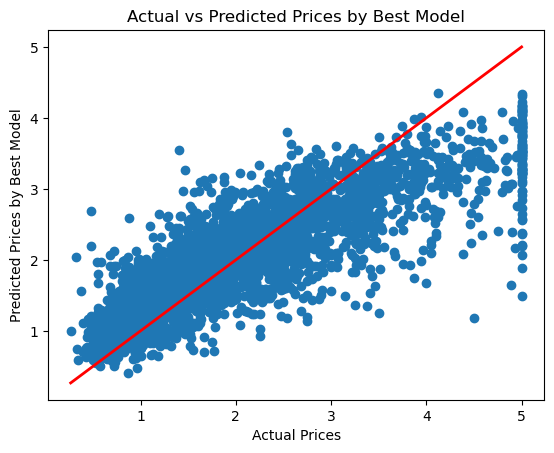

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import itertools
from joblib import Parallel, delayed

# Различные виды распределений
distributions = {
    'uniform': lambda num_samples: np.random.rand(num_samples),
    'normal': lambda num_samples: np.random.randn(num_samples),
    'exponential': lambda num_samples: np.random.exponential(scale=1.0, size=num_samples),
    # 'gamma': lambda num_samples: np.random.gamma(shape=2.0, scale=1.0, size=num_samples)
}

num_samples = 1000
best_mse = float('inf')
best_r2 = float('-inf')
best_distribution = None
best_new_X = None
best_new_y = None

# Все возможные комбинации распределений для каждого столбца
distribution_names = list(distributions.keys())
all_combinations = list(itertools.product(distribution_names, repeat=X_train.shape[1]))

# Функция для генерации данных и оценки модели
def evaluate_combination(combination):
    random_data = np.zeros((num_samples, X_train.shape[1]))
    
    for col_idx, dist_name in enumerate(combination):
        random_data[:, col_idx] = distributions[dist_name](num_samples)
    
    random_data_df = pd.DataFrame(random_data, columns=california.feature_names)
    scaler = StandardScaler()
    random_data_scaled = scaler.fit_transform(random_data_df)
    
    generated_targets = model_e.predict(random_data_scaled)
    
    new_X = pd.DataFrame(random_data, columns=california.feature_names)
    new_y = pd.Series(generated_targets, name='Generated_Price')
    
    new_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    new_model.fit(new_X, new_y)
    
    y_pred_new_model = new_model.predict(pd.DataFrame(X_test_scaled, columns=california.feature_names))
    
    mse_new_model = mean_squared_error(y_test, y_pred_new_model)
    r2_new_model = r2_score(y_test, y_pred_new_model)
    
    return combination, mse_new_model, r2_new_model, new_X, new_y

# Параллельное выполнение
results = Parallel(n_jobs=-1)(delayed(evaluate_combination)(comb) for comb in all_combinations)

# Поиск лучшего результата
for combination, mse_new_model, r2_new_model, new_X, new_y in results:
    if mse_new_model < best_mse:
        print(f"найдены данные получше... mse: {mse_new_model} r2:{r2_new_model}")
        best_mse = mse_new_model
        best_r2 = r2_new_model
        best_distribution = combination
        best_new_X = new_X
        best_new_y = new_y

print(f"Best distribution combination: {best_distribution}, Best MSE: {best_mse:.2f}, Best R^2: {best_r2:.2f}")

# Обучение и оценка модели с наилучшей комбинацией распределений
best_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
best_model.fit(best_new_X, best_new_y)

y_pred_best_model = best_model.predict(pd.DataFrame(X_test_scaled, columns=california.feature_names))

plt.scatter(y_test, y_pred_best_model)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices by Best Model')
plt.title('Actual vs Predicted Prices by Best Model')
plt.show()


## подбор параметров распределений для каждого столбца
теперь подбираем параметры распределений для столбцов по известному лучшему варианту распределения при помощи оптуны

  0%|          | 0/100 [00:00<?, ?it/s][I 2024-10-14 21:18:48,807] A new study created in memory with name: no-name-add95e89-32fb-40ab-88ea-fd019313140f
[I 2024-10-14 21:18:49,055] Trial 0 finished with value: 0.3835612931795965 and parameters: {'normal_mean_0': 0, 'normal_std_0': 1, 'exponential_scale_1': 0.5, 'uniform_low_2': 0, 'uniform_high_2': 0.75, 'normal_mean_3': 0, 'normal_std_3': 2, 'normal_mean_4': 0, 'normal_std_4': 2, 'normal_mean_5': 0, 'normal_std_5': 1, 'normal_mean_6': 0, 'normal_std_6': 2, 'normal_mean_7': 0, 'normal_std_7': 2}. Best is trial 0 with value: 0.3835612931795965.
100%|██████████| 100/100 [00:21<00:00,  4.63it/s]


Best parameters: {'normal_mean_0': 0, 'normal_std_0': 1, 'exponential_scale_1': 1, 'uniform_low_2': 0.25, 'uniform_high_2': 0.75, 'normal_mean_3': 0, 'normal_std_3': 1, 'normal_mean_4': 0, 'normal_std_4': 1, 'normal_mean_5': 0, 'normal_std_5': 1, 'normal_mean_6': 0, 'normal_std_6': 1, 'normal_mean_7': 0, 'normal_std_7': 2}
Best MSE: 0.34


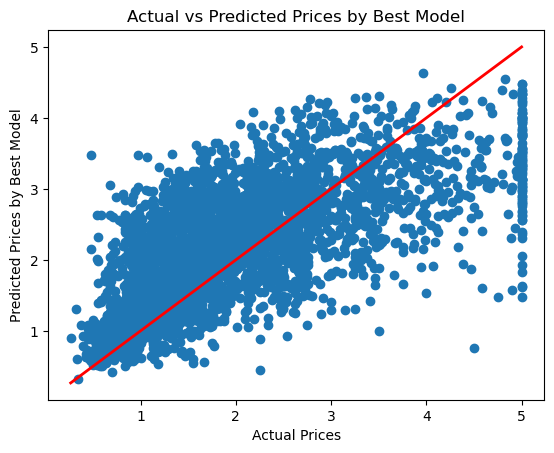

In [7]:
import optuna
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')

# Известные виды распределений для каждого столбца
known_distributions = best_distribution

# Определение функции для генерации данных с заданным распределением и параметрами
def generate_data(dist_name, params, size):
    if dist_name == 'uniform':
        return np.random.uniform(params['low'], params['high'], size)
    elif dist_name == 'normal':
        return np.random.normal(params['mean'], params['std'], size)
    elif dist_name == 'exponential':
        return np.random.exponential(params['scale'], size)
    elif dist_name == 'gamma':
        return np.random.gamma(params['shape'], params['scale'], size)
    else:
        raise ValueError(f"Unknown distribution name: {dist_name}")

# Определение функции для оптимизации
def objective(trial):
    random_data = np.zeros((num_samples, X_train.shape[1]))
    
    for col_idx, dist_name in enumerate(known_distributions):
        if dist_name == 'uniform':
            params = {
                'low': trial.suggest_categorical(f'{dist_name}_low_{col_idx}', [0, 0.25]),
                'high': trial.suggest_categorical(f'{dist_name}_high_{col_idx}', [0.5, 0.75])
            }
        elif dist_name == 'normal':
            params = {
                'mean': trial.suggest_categorical(f'{dist_name}_mean_{col_idx}', [0,0]),
                'std': trial.suggest_categorical(f'{dist_name}_std_{col_idx}', [1, 2])
            }
        elif dist_name == 'exponential':
            params = {
                'scale': trial.suggest_categorical(f'{dist_name}_scale_{col_idx}', [0.5, 1])
            }
        elif dist_name == 'gamma':
            params = {
                'shape': trial.suggest_categorical(f'{dist_name}_shape_{col_idx}', [1, 2]),
                'scale': trial.suggest_categorical(f'{dist_name}_scale_{col_idx}', [0.5, 1])
            }
        else:
            raise ValueError(f"Unknown distribution name: {dist_name}")
        
        random_data[:, col_idx] = generate_data(dist_name, params, num_samples)
        
    scaler = StandardScaler()
    random_data_df = pd.DataFrame(random_data, columns=california.feature_names)
    random_data_scaled = scaler.fit_transform(random_data_df)
    
    generated_targets = model_e.predict(random_data_df)
    
    new_X = pd.DataFrame(random_data_df, columns=california.feature_names)
    new_y = pd.Series(generated_targets, name='Generated_Price')
    
    new_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    new_model.fit(new_X, new_y)
    
    y_pred_new_model = new_model.predict(pd.DataFrame(X_test_scaled, columns=california.feature_names))
    
    mse_new_model = mean_squared_error(y_test, y_pred_new_model)
    
    return mse_new_model

# Настройка параметров для оптимизации
num_samples = 1000
n_trials = 100

# Создание объекта прогресса
progress_bar = tqdm(total=n_trials)

# Обернуть метод Optuna для обновления прогресса
class TqdmCallback(object):
    def __init__(self, progress_bar):
        self.progress_bar = progress_bar

    def __call__(self, study, trial):
        self.progress_bar.update()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=n_trials, callbacks=[TqdmCallback(progress_bar)])

# Закрыть прогресс-бар
progress_bar.close()

# Вывод лучших параметров
print(f"Best parameters: {study.best_params}")
print(f"Best MSE: {study.best_value:.2f}")

# Обучение и оценка модели с наилучшими параметрами
best_params = study.best_params
random_data = np.zeros((num_samples, X_train.shape[1]))

for col_idx, dist_name in enumerate(known_distributions):
    if dist_name == 'uniform':
        params = {
            'low': best_params[f'{dist_name}_low_{col_idx}'],
            'high': best_params[f'{dist_name}_high_{col_idx}']
        }
    elif dist_name == 'normal':
        params = {
            'mean': best_params[f'{dist_name}_mean_{col_idx}'],
            'std': best_params[f'{dist_name}_std_{col_idx}']
    }
    elif dist_name == 'exponential':
        params = {
            'scale': best_params[f'{dist_name}_scale_{col_idx}']
        }
    elif dist_name == 'gamma':
        params = {
            'shape': best_params[f'{dist_name}_shape_{col_idx}'],
            'scale': best_params[f'{dist_name}_scale_{col_idx}']
        }
    else:
        raise ValueError(f"Unknown distribution name: {dist_name}")

    random_data[:, col_idx] = generate_data(dist_name, params, num_samples)

random_data_df = pd.DataFrame(random_data, columns=california.feature_names)
scaler = StandardScaler()
random_data_scaled = scaler.fit_transform(random_data_df)

generated_targets = model_e.predict(random_data_scaled)

best_new_X = pd.DataFrame(random_data, columns=california.feature_names)
best_new_y = pd.Series(generated_targets, name='Generated_Price')

best_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
best_model.fit(best_new_X, best_new_y)

y_pred_best_model = best_model.predict(pd.DataFrame(X_test_scaled, columns=california.feature_names))

r2_new_model = r2_score(y_test, y_pred_best_model)

plt.scatter(y_test, y_pred_best_model)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices by Best Model')
plt.title('Actual vs Predicted Prices by Best Model')
plt.show()

In [27]:
r2_new_model = r2_score(y_test, y_pred_best_model)
r2_new_model

0.4112493193137209

## Использование информации о входных данных

In [10]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
53,1.2475,52.0,4.075000,1.140000,1162.0,2.905000,37.82,-122.27
2059,3.0139,39.0,5.175732,1.071130,638.0,2.669456,36.63,-119.68
3204,4.2396,4.0,5.197531,1.058642,920.0,2.839506,36.35,-119.63
1303,2.0411,24.0,4.186347,1.077491,1239.0,2.285978,38.00,-121.85
13632,2.0461,46.0,4.909814,1.127321,1100.0,2.917772,34.07,-117.34
...,...,...,...,...,...,...,...,...
11734,2.5373,18.0,4.734887,1.031318,2954.0,2.151493,38.91,-121.06
20406,7.0010,26.0,7.885246,1.004098,775.0,3.176230,34.20,-118.87
12427,3.8846,19.0,5.659574,1.046099,1201.0,4.258865,33.66,-116.21
1020,3.8523,25.0,5.500000,1.180791,900.0,2.542373,37.66,-121.78


In [11]:
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000
mean,3.728935,29.688671,5.201696,1.047139,1282.034790,2.861996,35.642254,-119.602352
std,1.510314,12.541698,1.034312,0.064937,637.639768,0.629119,2.153838,2.013884
min,0.536000,1.000000,2.133929,0.870000,5.000000,1.263566,32.550000,-124.230000
25%,2.568100,19.000000,4.475929,1.003861,812.000000,2.435404,33.930000,-121.810000
50%,3.562500,30.000000,5.172507,1.045558,1168.000000,2.810166,34.240000,-118.490000
75%,4.688750,38.000000,5.919634,1.087835,1640.500000,3.257031,37.740000,-118.020000
max,7.997600,52.000000,8.275862,1.232855,3176.000000,4.557292,41.950000,-114.570000


Иногда мы понимаем природу входных данных и имеем некоторые знаниая о предметной области. Здесь рассматривается задача прогнозирования цен домов, поэтому мы вполне можем сгенерировать достаточно правдоподобные данные. Как минимум можно использовать предположения о:
 - мин-макс значениях
 - кооринатах
 - средних значениях

In [13]:
a = {'b':3}
print(f'{a["b"]}')

3
